In [1]:
import pandas as pd 
import numpy as np
import os 
import glob as glob
import matplotlib.pyplot as plt

#### Bergmann Hommens posthoc with Friedman 0.05

In [24]:
path = 'critical_diff/real_no_pa/'
metric = 'slogl'
bergmann_psthoc = pd.read_csv(path+f'{metric}_bergmann_hommel.csv', index_col = 0)
bergmann_psthoc.fillna(1, inplace=True)
cols = bergmann_psthoc.columns
newcols = [col.replace('.','-') for col in cols]
bergmann_psthoc.columns = newcols
bergmann_psthoc.index = newcols
bergmann_psthoc

,B-SPBN-Simple,GBN-BGe,GBN-BIC,SPBN
B-SPBN-Simple,1.000000,0.028124,0.028124,0.166529
GBN-BGe,0.028124,1.000000,1.000000,0.000089
GBN-BIC,0.028124,1.000000,1.000000,0.000089
SPBN,0.166529,0.000089,0.000089,1.000000


In [25]:
avg_rank = pd.read_csv(path+f'{metric}_avg_ranking.csv',index_col = 0)
avg_rank.sort_values(by='average.ranking', inplace=True)
avg_rank = avg_rank['average.ranking']
index = avg_rank.index
newindex = [col.replace('.','-') for col in index]
avg_rank.index = newindex
# avg_rank.index = newcols
avg_rank

SPBN             1.0
B-SPBN-Simple    2.0
GBN-BGe          3.5
GBN-BIC          3.5
Name: average.ranking, dtype: float64

/tmp/ipykernel_16044/1100226844.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


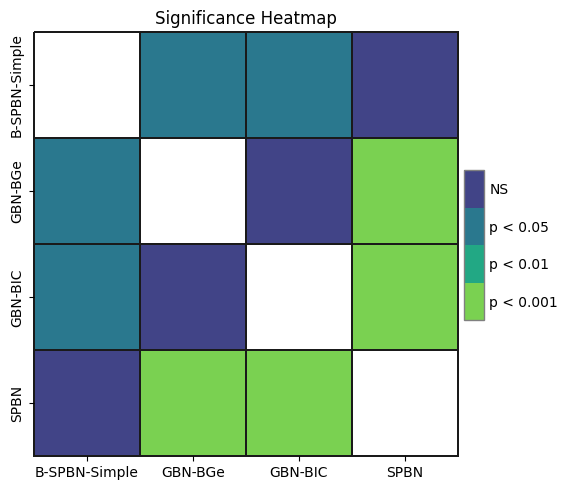

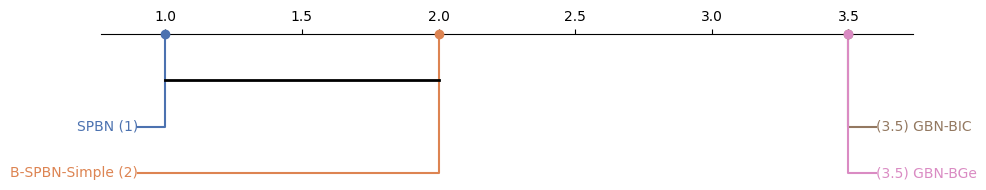

In [26]:
import scikit_posthocs as sp
import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title('Significance Heatmap')

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#414487ff', '#7ad151ff' , '#22a884ff','#2a788eff' ]
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.1', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.96, 0.35, 0.04, 0.3], 'cmap': cmap}
cmap2 = sns.color_palette("deep")
color_mapping = {
    'SPBN': cmap2[0],          # blue
    'B-SPBN-Simple': cmap2[1],          # orange
    'B-SPBN-Linear': cmap2[2],   # green
    'B-SPBN-FKDE-Simple': cmap2[3],     # red
    'B-SPBN-FKDE-Linear': cmap2[4], # purple
    'GBN-BIC': cmap2[5],       # brown
    'GBN-BGe': cmap2[6]        # black
}

# Define label properties with corresponding colors
label_props = {model: {'color': color} for model, color in color_mapping.items()}


sp.sign_plot(bergmann_psthoc, **heatmap_args)
plt.tight_layout()
plt.savefig(path+f'{metric}_significanceHM.pdf',format='pdf', bbox_inches="tight")

plt.figure(figsize=(10, 2), dpi=100)
# plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, 
                               bergmann_psthoc,
                               text_h_margin=0.1,
                               color_palette=color_mapping
                               #label_props=label_props,#{'color': 'black', 'fontweight': None},
                                #crossbar_props={'color': 'black', 'marker': None},
                                #marker_props={'marker': '', 's': 50, 'color': 'k', 'edgecolor': 'k'},
                               # elbow_props={'color': '#3a3b3c'},
                               )
plt.tight_layout()
plt.savefig(path+f'{metric}_CDD_bergmann.pdf',format='pdf', bbox_inches="tight")